In [1]:
# 📌 Step 1: Install dependencies (if needed)
!pip install opencv-python opencv-contrib-python matplotlib

# 📌 Step 2: Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def show_img(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


Saving Screenshot 2025-04-25 115830.png to Screenshot 2025-04-25 115830.png


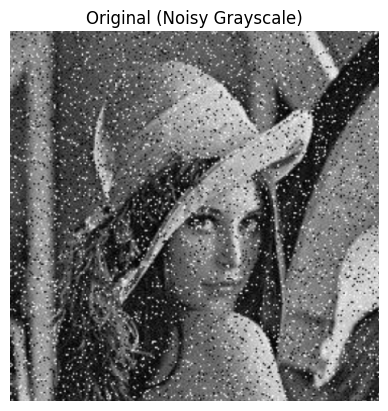

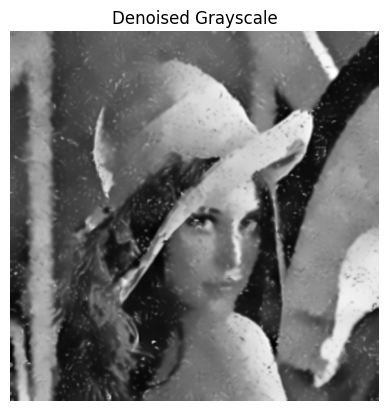

In [2]:
# Upload grayscale noisy image
from google.colab import files
uploaded = files.upload()

# Read the grayscale image
import cv2
import matplotlib.pyplot as plt

filename = list(uploaded.keys())[0]
gray_img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Denoise the grayscale image
denoised = cv2.fastNlMeansDenoising(gray_img, None, h=30, templateWindowSize=7, searchWindowSize=21)

# Show results
def show_gray(img, title='Image'):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

show_gray(gray_img, 'Original (Noisy Grayscale)')
show_gray(denoised, 'Denoised Grayscale')

Saving Screenshot 2025-04-25 121512.png to Screenshot 2025-04-25 121512.png
Saving Screenshot 2025-04-25 121502.png to Screenshot 2025-04-25 121502.png


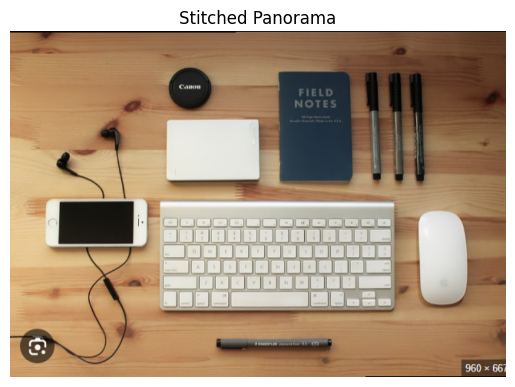

In [6]:

# 📌 Upload 2+ images for stitching
uploaded = files.upload()
images = [cv2.imread(fname) for fname in uploaded.keys()]

# 📌 Stitch
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

# 📌 Show result
if status == cv2.Stitcher_OK:
    show_img(result, 'Stitched Panorama')
else:
    print('❌ Stitching failed')

Saving Screenshot 2025-04-25 121512.png to Screenshot 2025-04-25 121512 (1).png
Saving Screenshot 2025-04-25 121502.png to Screenshot 2025-04-25 121502 (1).png


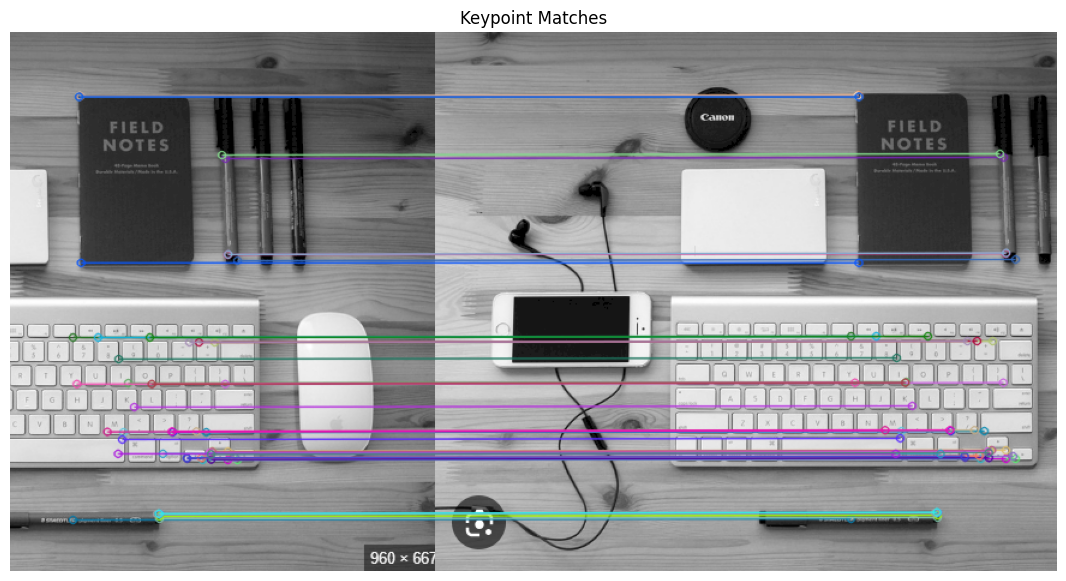

Rotation Matrix:
 [[ 9.99957304e-01  9.24065012e-03 -1.01644297e-05]
 [-9.24065029e-03  9.99957304e-01 -1.75028500e-05]
 [ 1.00022580e-05  1.75960287e-05  1.00000000e+00]]
Translation Vector:
 [[ 9.99999837e-01]
 [ 5.70193210e-04]
 [-2.88041167e-05]]


In [7]:
# 📌 Upload two overlapping images
uploaded = files.upload()
imgs = list(uploaded.keys())
img1 = cv2.imread(imgs[0], 0)
img2 = cv2.imread(imgs[1], 0)

# 📌 Detect ORB keypoints and match
orb = cv2.ORB_create(500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)
plt.figure(figsize=(15, 7))
plt.imshow(img_matches)
plt.title('Keypoint Matches')
plt.axis('off')
plt.show()

# 📌 Estimate Essential Matrix & Pose
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches])

E, mask = cv2.findEssentialMat(pts1, pts2, focal=1.0, pp=(0., 0.), method=cv2.RANSAC, prob=0.999, threshold=1.0)
_, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2)

# 📌 Display result
print("Rotation Matrix:\n", R)
print("Translation Vector:\n", t)

In [2]:
import cv2
import numpy as np

cap = cv2.VideoCapture(1)  # 0 for default webcam

# Create background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Spatial Domain: Grayscale + Edge Detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)

    # Frequency Domain: FFT
    dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

    # Background-Foreground Detection
    fgmask = fgbg.apply(frame)

    # Display
    cv2.imshow('Original', frame)
    cv2.imshow('Edges', edges)
    cv2.imshow('Magnitude Spectrum', np.uint8(magnitude_spectrum))
    cv2.imshow('Foreground Mask', fgmask)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [4]:
pip install kaggle

In [7]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
from google.colab import files
uploaded = files.upload()
